In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
df = pd.read_csv("salary-predict-dataset.csv")

In [16]:
df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [18]:
df.describe()

,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


In [19]:
df.isnull().sum()

,0
Education,0
Experience,0
Location,0
Job_Title,0
Age,0
Gender,0
Salary,0


In [20]:
df.isna().sum()

,0
Education,0
Experience,0
Location,0
Job_Title,0
Age,0
Gender,0
Salary,0


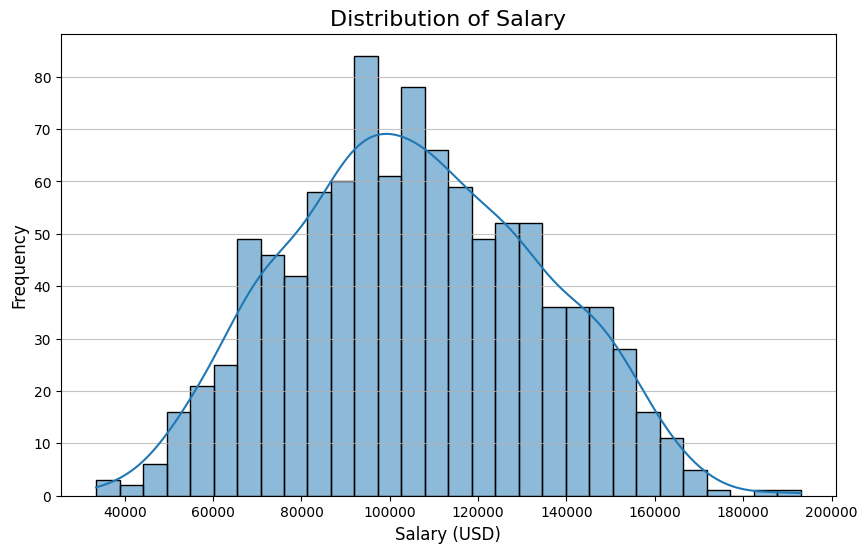

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(df['Salary'], kde=True, bins=30)
plt.title('Distribution of Salary', fontsize=16)
plt.xlabel('Salary (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [22]:
df[df['Salary'] == 180000]

,Education,Experience,Location,Job_Title,Age,Gender,Salary


In [23]:
print(f"Skewness: {df['Salary'].skew():.2f}")
print(f"Kurtosis: {df['Salary'].kurtosis():.2f}")

Skewness: 0.10
Kurtosis: -0.58


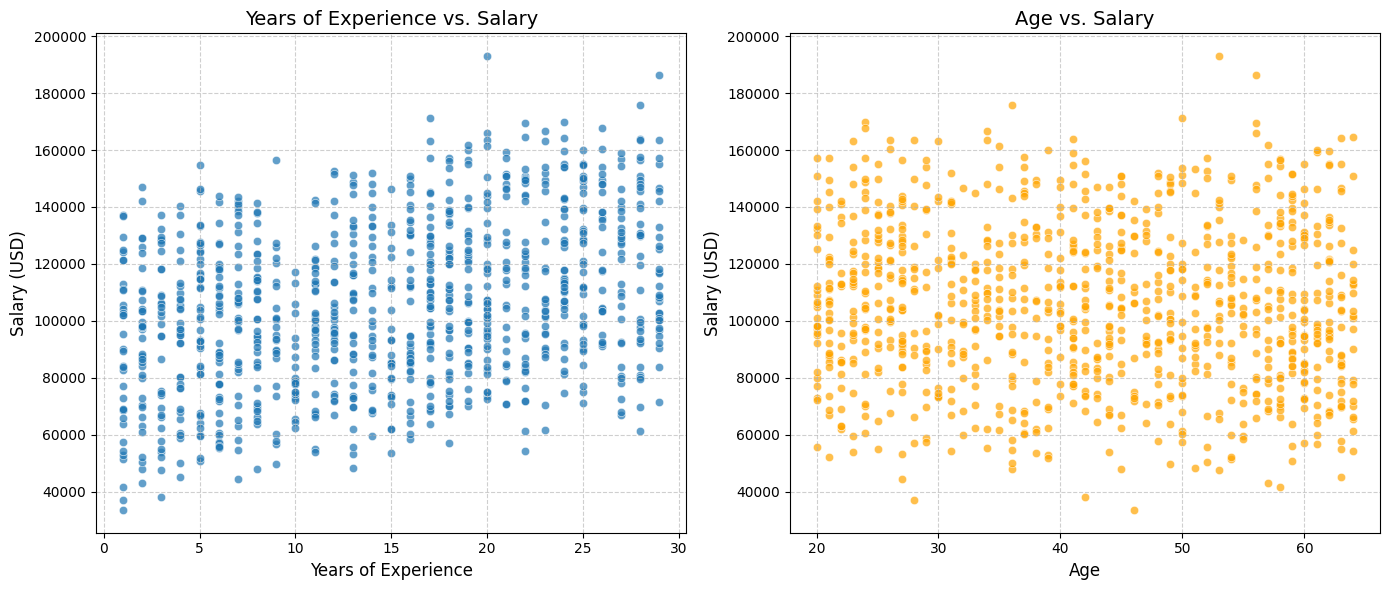

In [24]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Experience', y='Salary', data=df, alpha=0.7)
plt.title('Years of Experience vs. Salary', fontsize=14)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Salary', data=df, alpha=0.7, color='orange')
plt.title('Age vs. Salary', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [25]:
print(df[['Age', 'Experience', 'Salary']].corr())

                 Age  Experience    Salary
Age         1.000000    0.044296 -0.053174
Experience  0.044296    1.000000  0.341918
Salary     -0.053174    0.341918  1.000000


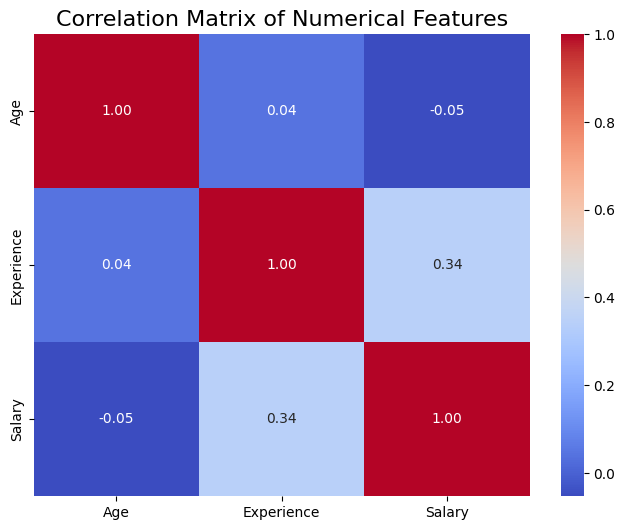

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Age', 'Experience', 'Salary']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

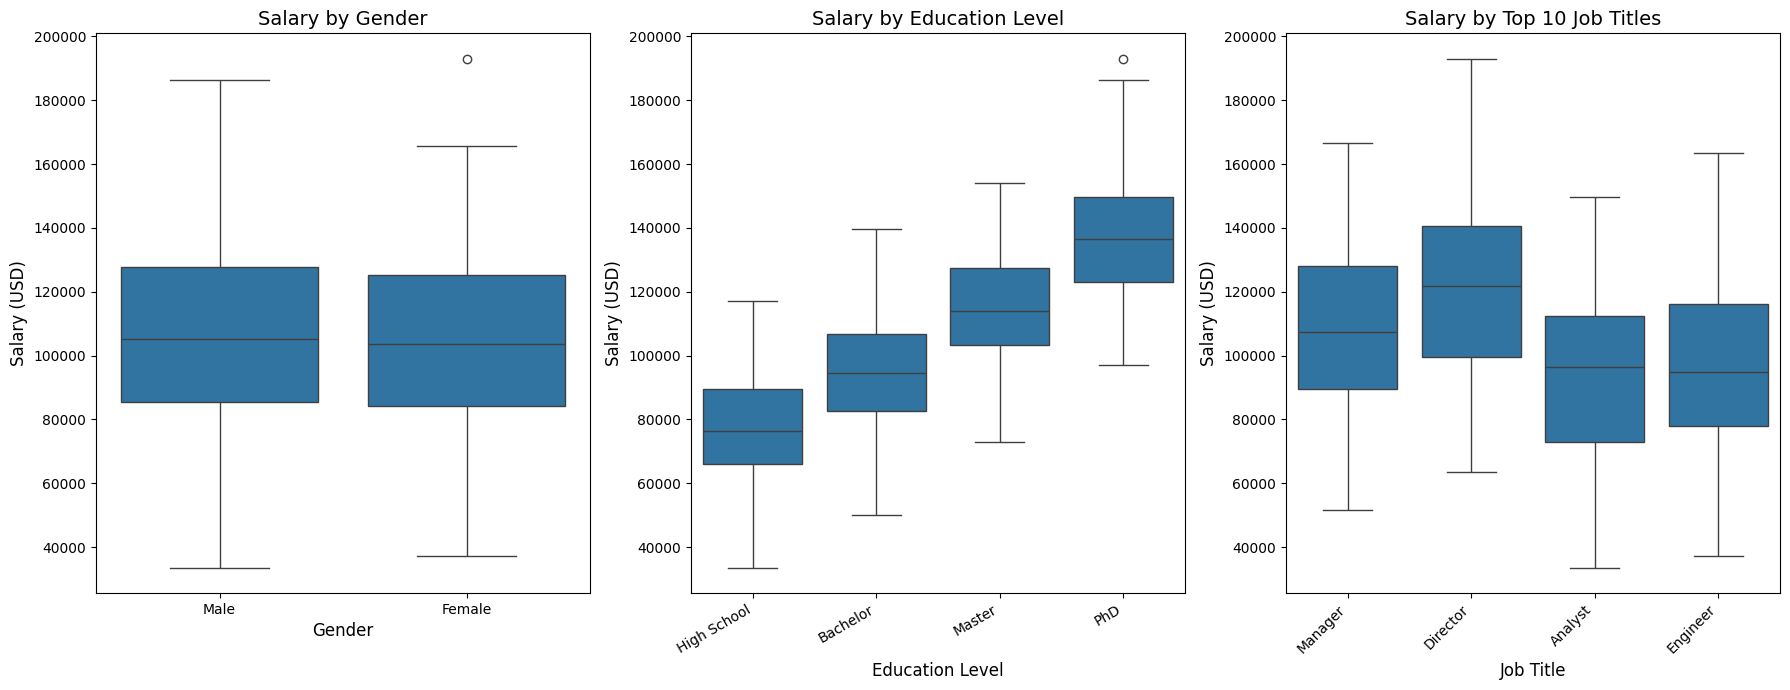

In [27]:
plt.figure(figsize=(18, 7))

plt.subplot(1, 3, 1)
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Salary by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)

plt.subplot(1, 3, 2)
education_order = ["High School", "Bachelor", "Master", "PhD"]
sns.boxplot(x='Education', y='Salary', data=df, order=education_order)
plt.title('Salary by Education Level', fontsize=14)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.xticks(rotation=30, ha='right')

plt.subplot(1, 3, 3)
top_job_titles = df.groupby('Job_Title')['Salary'].mean().nlargest(10).index
sns.boxplot(x='Job_Title', y='Salary', data=df[df['Job_Title'].isin(top_job_titles)])
plt.title('Salary by Top 10 Job Titles', fontsize=14)
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [29]:
X = df.drop('Salary', axis=1)
y = df['Salary']

In [30]:
X,y

(       Education  Experience  Location Job_Title  Age  Gender
 0    High School           8     Urban   Manager   63    Male
 1            PhD          11  Suburban  Director   59    Male
 2       Bachelor          28  Suburban   Manager   61  Female
 3    High School          29     Rural  Director   45    Male
 4            PhD          25     Urban   Analyst   26  Female
 ..           ...         ...       ...       ...  ...     ...
 995  High School           8  Suburban   Analyst   25  Female
 996  High School          24     Urban  Engineer   30  Female
 997       Master          18     Rural   Analyst   44    Male
 998     Bachelor          27  Suburban  Director   31  Female
 999  High School          25     Urban  Director   41  Female
 
 [1000 rows x 6 columns],
 0       84620.053665
 1      142591.255894
 2       97800.255404
 3       96834.671282
 4      132157.786175
            ...      
 995     64683.389864
 996     74468.205020
 997     98207.026024
 998    108544.922

In [31]:
education_level_mapping = {
    "High School": 0,
    "Bachelor": 1,
    "Master": 2,
    "PhD": 3
}
X['Education'] = X['Education'].map(education_level_mapping)

In [32]:
numerical_features = ['Age', 'Experience']
categorical_features = ['Gender', 'Job_Title', 'Location']

In [33]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

In [37]:
results = {}
trained_pipelines = {}

for name, model in models.items():
    print(f"Training {name} ")

    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', model)])

    model_pipeline.fit(X_train, y_train)
    trained_pipelines[name] = model_pipeline

    y_pred = model_pipeline.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}

    print(f"  MAE: {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R2 Score: {r2:.2f}\n")

Training Linear Regression 
  MAE: 8132.51
  RMSE: 10309.22
  R2 Score: 0.87

Training Random Forest 
  MAE: 9343.85
  RMSE: 11473.08
  R2 Score: 0.84

Training Gradient Boosting 
  MAE: 8623.50
  RMSE: 10665.12
  R2 Score: 0.86




Model Performance Summary (Sorted by R2 Score)
                           MAE          RMSE        R2
Linear Regression  8132.511833  10309.219235  0.869839
Gradient Boosting  8623.504644  10665.121044  0.860697
Random Forest      9343.853359  11473.075793  0.838791


/tmp/ipython-input-48-3366186444.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['R2'], palette='viridis')


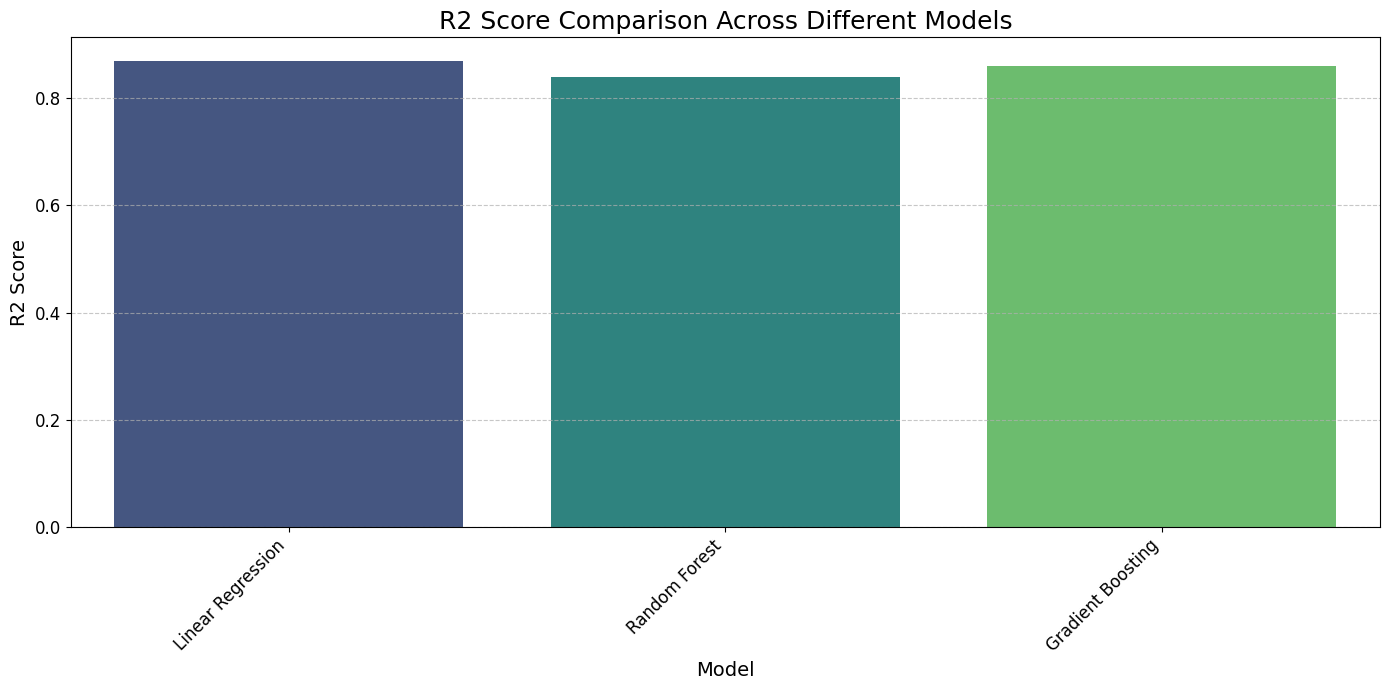

In [48]:
results_df = pd.DataFrame(results).T
print("\nModel Performance Summary (Sorted by R2 Score)")
print(results_df.sort_values(by='R2', ascending=False))

plt.figure(figsize=(14, 7))
sns.barplot(x=results_df.index, y=results_df['R2'], palette='viridis')
plt.title('R2 Score Comparison Across Different Models', fontsize=18)
plt.xlabel('Model', fontsize=14)
plt.ylabel('R2 Score', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [39]:
import joblib

In [40]:
results_df = pd.DataFrame(results).T
best_model_name = results_df['R2'].idxmax()
best_r2_score = results_df['R2'].max()

best_model_pipeline = trained_pipelines[best_model_name]

filename = 'best_salary_prediction_model.pkl'


joblib.dump(best_model_pipeline, filename)

print("Model saved")

Model saved


In [41]:
job_titles = df['Job_Title'].unique().tolist()
education_levels = ["High School", "Bachelor", "Master", "PhD"]
locations = ["Urban", "Suburban", "Rural"]

with open('job_titles.txt', 'w') as f:
    for item in job_titles:
        f.write(f"{item}\n")

with open('education_levels.txt', 'w') as f:
    for item in education_levels:
        f.write(f"{item}\n")

with open('locations.txt', 'w') as f:
    for item in locations:
        f.write(f"{item}\n")

In [42]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.5 MB/s eta 0:00:00


In [43]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd
import numpy as np

#1. Load the Trained Model and Data for Dropdowns
model = joblib.load('best_salary_prediction_model.pkl')

# Load job titles and education levels from the saved files
with open('job_titles.txt', 'r') as f:
  job_titles = [line.strip() for line in f]
with open('education_levels.txt', 'r') as f:
  education_levels = [line.strip() for line in f]
with open('locations.txt', 'r') as f:
  locations = [line.strip() for line in f]



# Define the ordinal mapping for Education Level
education_level_mapping = {
    "High School": 0,
    "Bachelor": 1,
    "Master": 2,
    "PhD": 3
}

#2. Configure Streamlit Page Settings
st.set_page_config(
    page_title="Salary Prediction App 💰",
    layout="centered",
    initial_sidebar_state="auto"
)

#3. App Title and Description
st.title("💰 Employee Salary Predictor")
st.write("Enter employee details to get an estimated salary prediction based on our best machine learning model.")
st.markdown("---")

#4. Input Fields for User Data
st.header("Employee Details")

# Using columns for a cleaner layout
col1, col2 = st.columns(2)

with col1:
    age = st.slider("Age", 18, 65, 30, help="Employee's current age in years.")
    gender = st.selectbox("Gender", ["Male", "Female"], help="Employee's gender.")

with col2:
    years_experience = st.slider("Years of Experience", 0, 40, 5, help="Total professional work experience in years.")
    # Use the loaded education levels for the selectbox
    education_level_input = st.selectbox("Education Level", education_levels, help="Highest level of education attained.")

# Job title can have many options, so a selectbox with sorting is good
job_title = st.selectbox("Job Title", sorted(job_titles), help="The specific job role or title.")
location = st.selectbox("Location", sorted(locations), help="The geographic location of the job.") # Added Location input


st.markdown("---")

#5. Prediction Button and Output
if st.button("Predict Salary", help="Click to get the estimated salary."):
    # Create a DataFrame from the user's input
    input_data = pd.DataFrame([{
        'Age': age,
        'Gender': gender,
        'Education': education_level_mapping[education_level_input], # Convert education string to its numerical mapped value
        'Job_Title': job_title,
        'Experience': years_experience,
        'Location': location
    }])

    predicted_salary = model.predict(input_data)[0]
    # Display the prediction
    st.subheader("Predicted Salary:")
    st.success(f"Estimated Salary: **${predicted_salary:,.2f}**")
    st.balloons()

#6. Sidebar Information
st.sidebar.header("About This Application")
st.sidebar.info(
    "This app utilizes a machine learning model to estimate salaries based on various employee attributes. "
    "The model was trained on Linear Regression, Random Forest and Gradient Boosting then the best performing one was selected from several algorithms."
)
st.sidebar.markdown("---")
st.sidebar.write("Developed by Harsh Singh Sikarwar")

Writing app.py


In [44]:
from google.colab import userdata
authtoken = userdata.get('ngrok')
!ngrok authtoken {authtoken}

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [45]:
import os
import threading

def run_streamlit():
  os.system('streamlit run app.py --server.port 8501')

thread = threading.Thread(target=run_streamlit)
thread.start()

In [51]:
from pyngrok import ngrok
import time

time.sleep(5)

public_url = ngrok.connect(8501)
print("Your Streamlit application is live here:", public_url)

Your Streamlit application is live here: NgrokTunnel: "https://d5be31dc00d1.ngrok-free.app" -> "http://localhost:8501"
